In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class',axis=1)
X = pd.get_dummies(X, drop_first=True)

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = {'n_estimators': [50,100],
              'learning_rate': [0.1,0.05,0.2],
              'max_depth': [3,4,5]
             }

In [11]:
gb_model = GradientBoostingClassifier()

In [12]:
grid = GridSearchCV(gb_model, param_grid)

In [13]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [14]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [15]:
predictions = grid.predict(X_test)

In [16]:
predictions

array(['p', 'e', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'p', 'e',
       'e', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p', 'e',
       'e', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p',
       'p', 'e', 'p', 'e', 'p', 'p', 'p', 'p', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'p', 'p', 'p', 'e', 'e', 'e', 'e', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'p', 'e', 'p', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'e', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'e', 'e',
       'e', 'e', 'p', 'p', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'p', 'p',
       'p', 'p', 'e', 'p', 'e', 'e', 'e', 'p', 'e', 'e', 'e', 'e', 'e',
       'e', 'e', 'p', 'e', 'e', 'p', 'p', 'e', 'p', 'e', 'p', 'e', 'e',
       'p', 'e', 'p', 'p', 'e', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'p', 'e', 'e', 'e', 'p', 'p', 'p', 'e', 'e', 'p', 'e', 'e', 'p',
       'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e', 'p', 'e',
       'e', 'e', 'e', 'e', 'e', 'e', 'p', 'e', 'p', 'e', 'p', 'p

In [18]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [20]:
grid.best_estimator_.feature_importances_

array([ 1.71990251e-04,  8.51817684e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.68661908e-03,  4.55488281e-16,  3.18114198e-16,
        0.00000000e+00,  3.21923481e-17,  1.91009994e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.20068556e-17,
        2.38983263e-03,  5.39562785e-02,  1.30525988e-04,  2.13629932e-02,
        2.07370954e-02,  8.99427502e-05,  6.15607813e-01,  6.24984488e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.21929787e-02,
        1.06415317e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.07526311e-18,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.16133025e-04,  1.22176929e-03,  1.28900686e-01,  3.03211335e-03,
        3.01484535e-02,  2.95999592e-04,  3.08474263e-04,  0.00000000e+00,
        9.90406460e-06,  4.24176168e-04,  3.68935675e-02,  1.59909499e-03,
        0.00000000e+00,  

In [22]:
feat_import = grid.best_estimator_.feature_importances_

In [23]:
impt_feat = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [28]:
impt_feat = impt_feat[impt_feat['Importance']>0.0005]

In [32]:
impt_feat = impt_feat.sort_values('Importance')

<AxesSubplot:ylabel='Importance'>

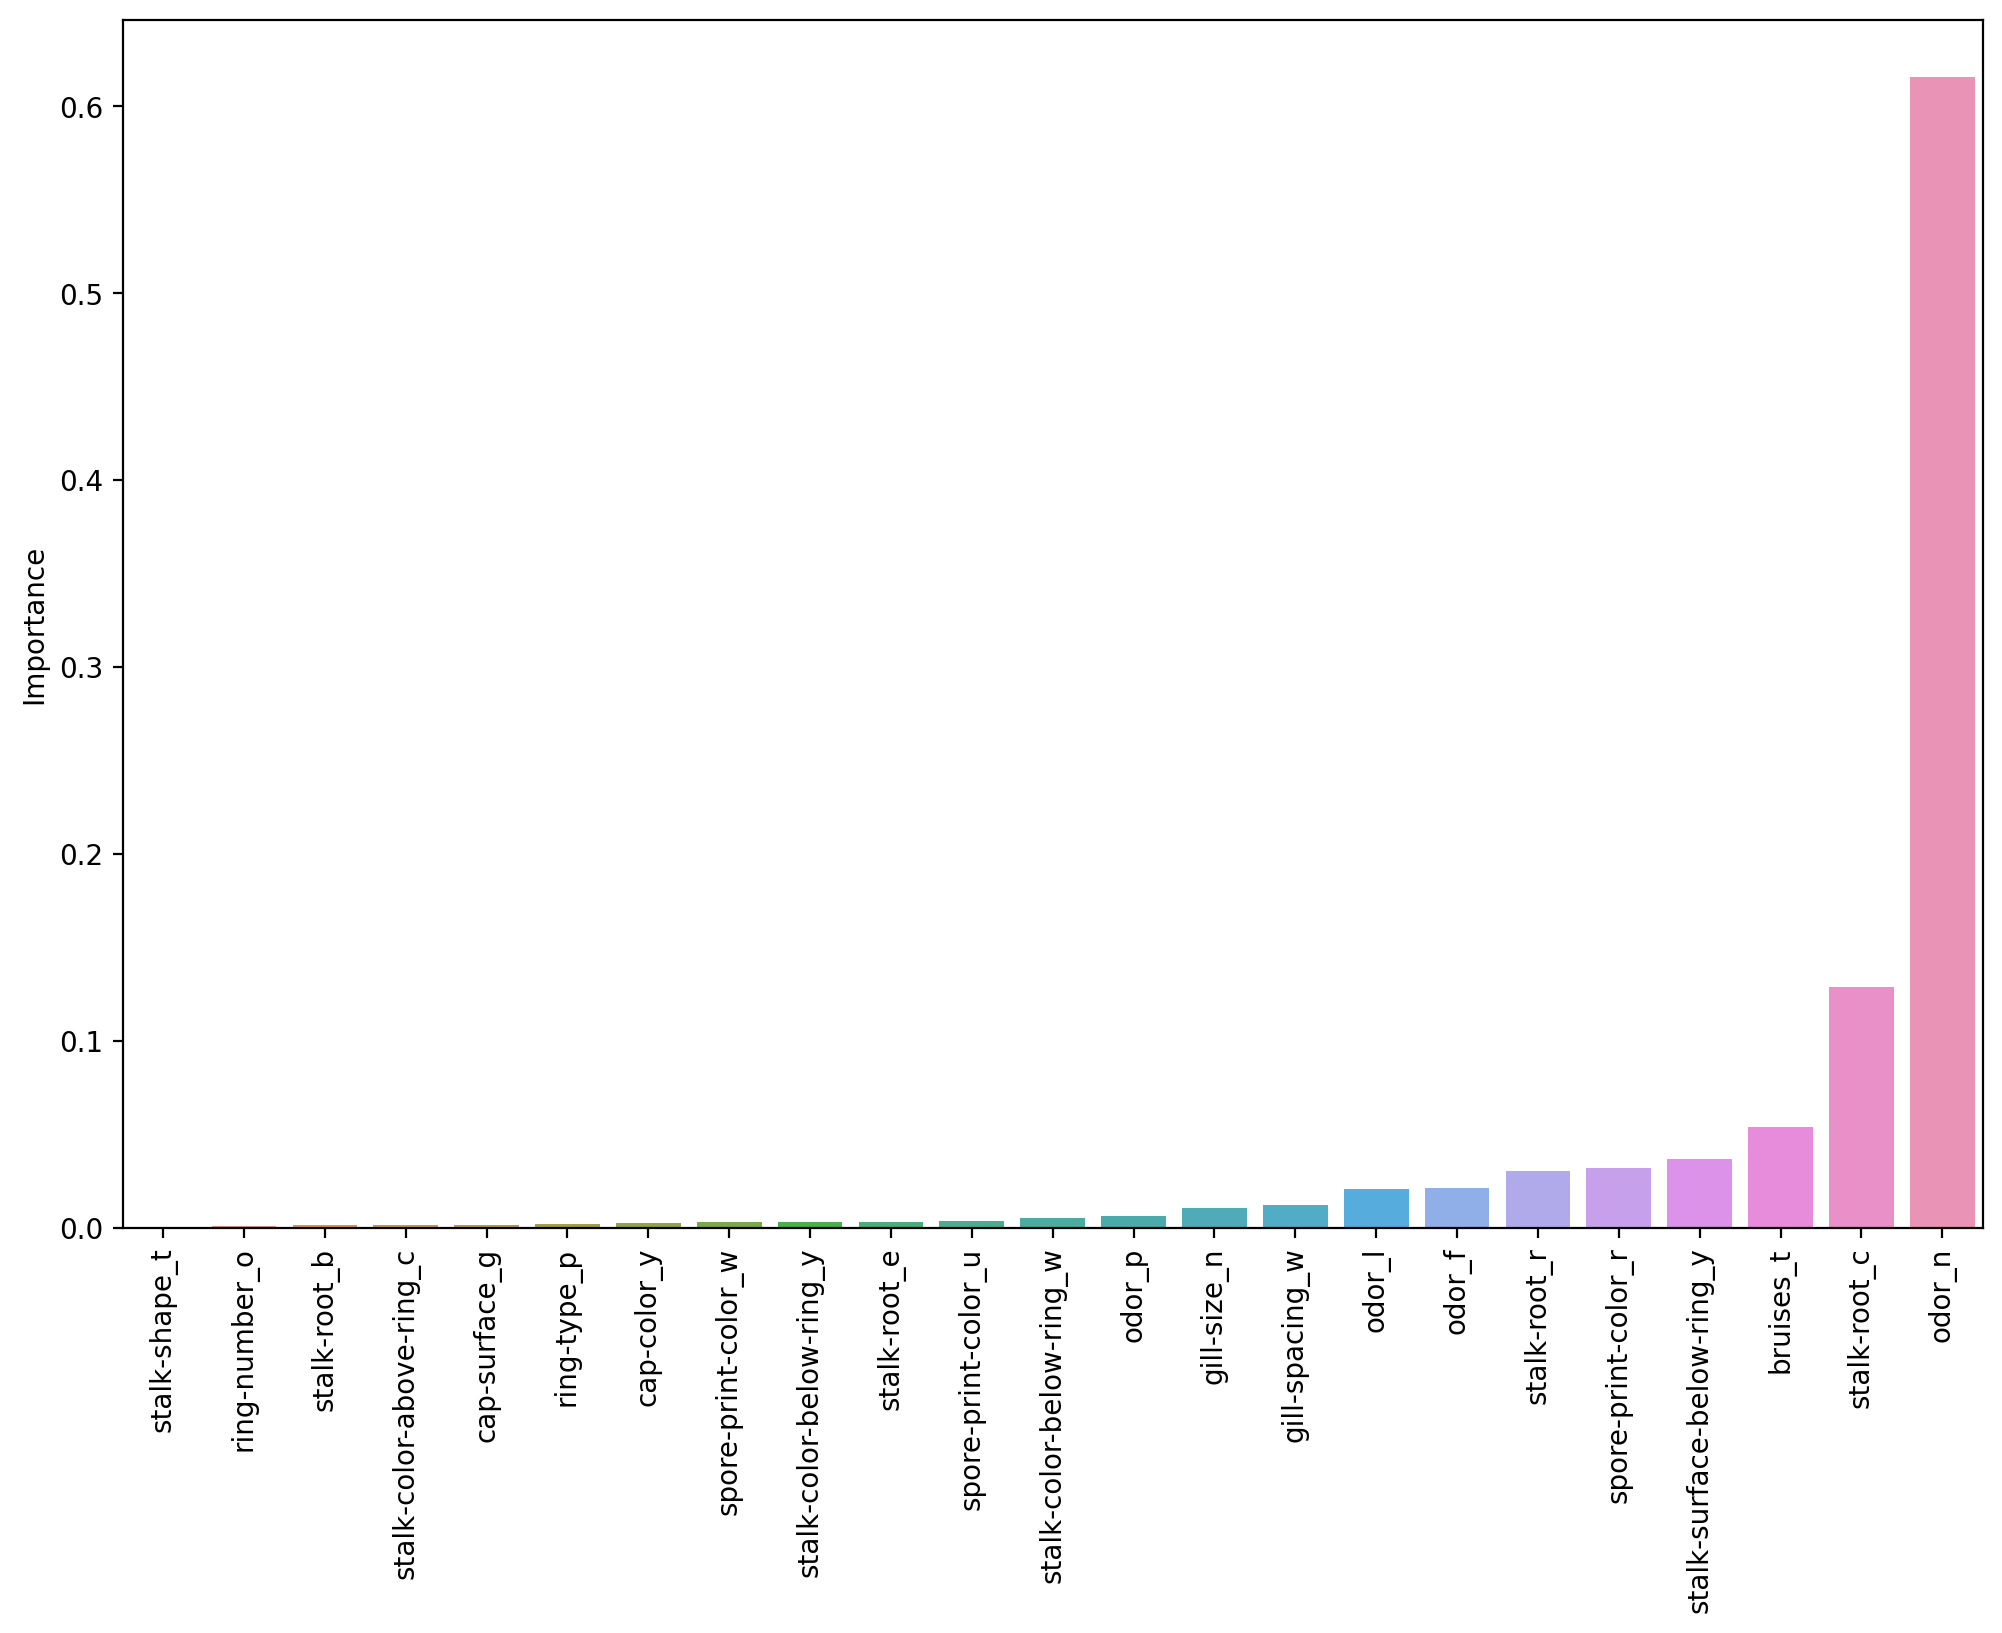

In [33]:
plt.figure(figsize=(12,8),dpi=200)
plt.xticks(rotation=90)
sns.barplot(data=impt_feat,x=impt_feat.index,y='Importance')